# Exploratory data analysis of COVID-19 data
Data source: Johns Hopkins University

Import packages

In [1]:
import datetime
import logging
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import sys

Import project-specific code

In [2]:
import src.covid_util as cvd

Set up logging

In [3]:
logging.basicConfig(level=logging.INFO, filename='log/log.txt', filemode='w')

Configuration / initialization

In [4]:
categories = ['deaths', 'confirmed']
dfs_raw = dict()
dfs = dict()

Download data from Johns Hopkins University

In [5]:
for category in categories:
    dfs_raw[category] = cvd.get_covid_data_jhu(category=category)
    
logging.info('status | done importing data')

Re-shape the dataframes

In [6]:
for category in categories:
    dfs[category] = cvd.reshape(dfs_raw[category], category)
    
logging.info('status | done re-shaping data')

Create population dataframe

In [7]:
pop = cvd.extract_population(dfs_raw['deaths'])

Perform initial consistency checks

In [8]:
p = cvd.initial_validation(dfs=dfs, pop=pop, categories=categories)
if p:
    print('initial consistency checks passed\n')
else:
    msg = 'initial consistency checks failed'
    logging.critical(msg)
    sys.exit(msg)

initial consistency checks passed



Assemble summary data for the latest available date

In [10]:
snapshot = cvd.latest_date_state_level(dfs, pop)

Show the summary data

In [11]:
snapshot.head()

,deaths,deaths per 100k,confirmed,confirmed per 100k,Population,as_of_date
Province_State,,,,,,
Alabama,504,10.279033,12376,252.407364,4903185,2020-05-19
Alaska,10,1.366970,400,54.678796,731545,2020-05-19
American Samoa,0,0.000000,0,0.000000,55641,2020-05-19
Arizona,705,9.685773,14576,200.255072,7278717,2020-05-19
Arkansas,102,3.379941,4923,163.131867,3017804,2020-05-19


### Create summary plots

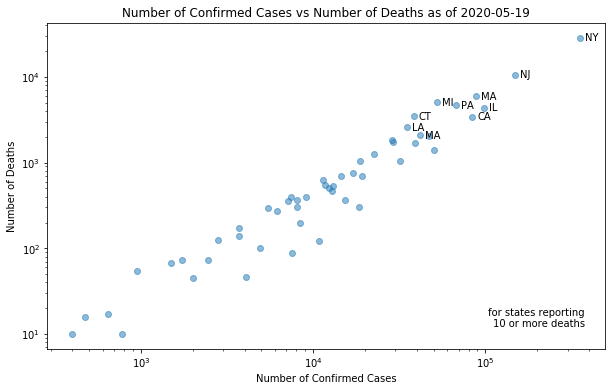

In [12]:
cvd.plot_confirmed_vs_deaths(snapshot);

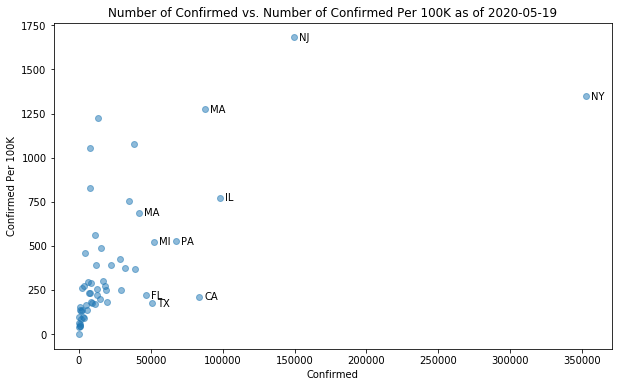

In [13]:
cvd.plot_count_vs_rate(snapshot, 'confirmed');

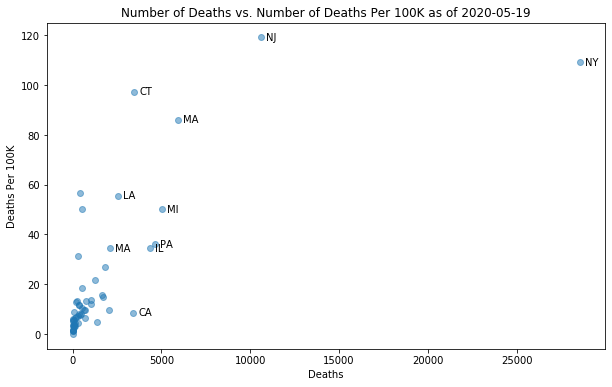

In [14]:
cvd.plot_count_vs_rate(snapshot, 'deaths');

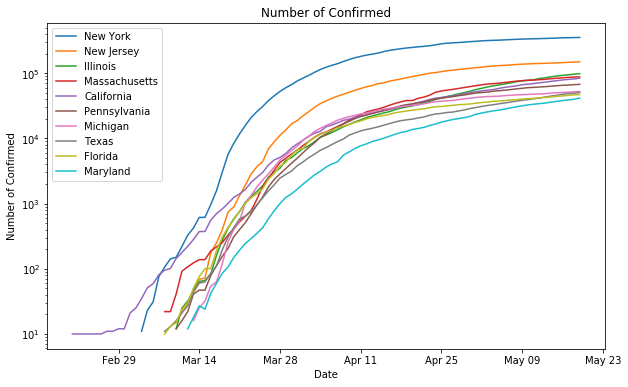

In [15]:
cvd.plot_observations_vs_date(dfs, 'confirmed');

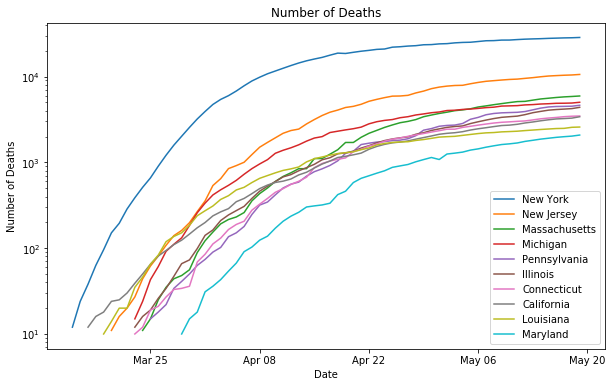

In [16]:
cvd.plot_observations_vs_date(dfs, 'deaths');

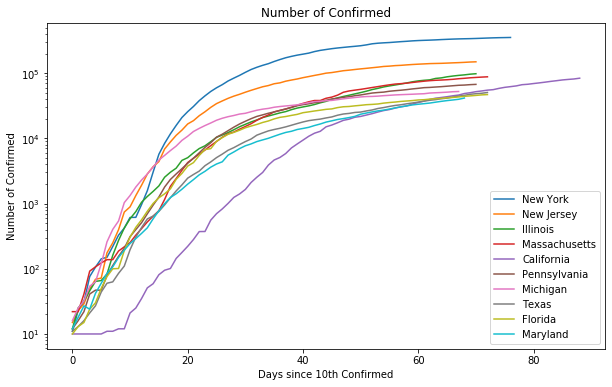

In [17]:
cvd.plot_observations_vs_days(dfs, 'confirmed');

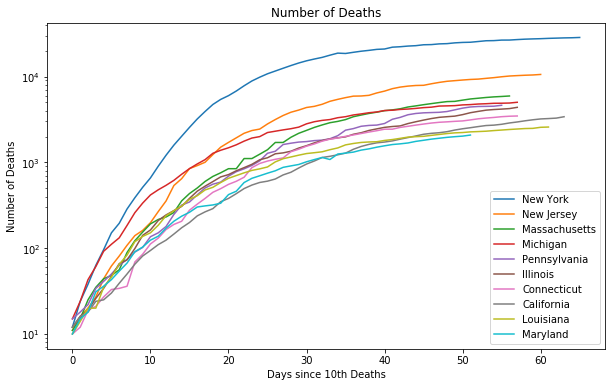

In [18]:
cvd.plot_observations_vs_days(dfs, 'deaths');

### Create plot for southern California
Check COVID data for southern California, which has ten counties.

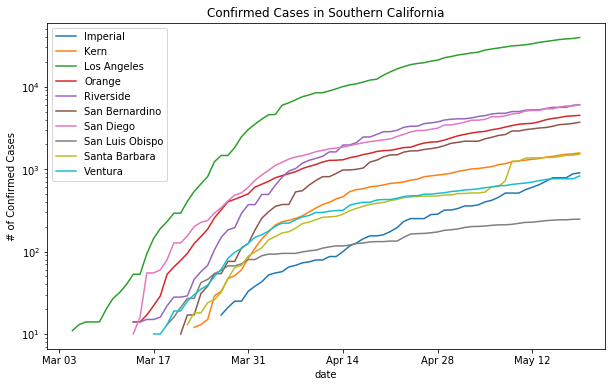

In [20]:
cvd.confirmed_cases_so_cal(dfs, category='confirmed');

Information about the environment

In [21]:
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2020-05-20 09:55:22


In [22]:
print('Python')
print('    ', sys.version_info)
print('    ', sys.hexversion, ' (hex version)')
print()
print('pandas     ', pd.__version__)
print('matplotlib ', matplotlib.__version__)

Python
     sys.version_info(major=3, minor=8, micro=2, releaselevel='final', serial=0)
     50856688  (hex version)

pandas      1.0.3
matplotlib  3.1.3
